In [1]:
import numpy as np
import os

import plugins.custom_config as custom_config
import plugins.bot_core as bot_core
import plugins.tool_dice as tool_dice
import plugins.info_help as info_help
import plugins.info_game as info_game
import plugins.utils as utils

from plugins import bot

b = bot

ujson module not found, using json


个人资料库加载成功!
找到以下查询资料: ['5e_00_spell_by_pear.json', '5e_01_armor_weapon_phb_by_xe.json', '5e_01_feat_by_pear.json', '5e_01_phb_classes_by_pear_hze_xe.json', '5e_01_phb_races_by_pear.json', '5e_02_phb_rule_by_pear.json', '5e_03_tools_phb_by_zxa.json', '5e_05_spell_list_by_pear.json', '5e_06_magic_items_dmg_by_hze.json', '5e_07_dmg_rule_by_pear.json', '5e_08_mm_by_hze_pear_query.json', '5e_08_phb_background_by_pear.json', '5e_09_creature_phb_dmg_by_hze.json', '5e_10_exp_classes_by_hh_pear.json', '5e_10_exp_magic_items_by_hh.json', '5e_10_exp_races_by_pear.json', '5e_10_xge_dm_tools_by_pear.json', '5e_19_egtw_by_pear_3_29.json', '5e_30_module_items_by_hh.json', 'syn_spell.json']
成功加载同义词表syn_spell.json, 共41个条目
查询资料库加载成功! 共3677个条目
找到以下牌堆: ['00_狂野魔法浪涌表_deck.json', '01_万象无常牌_deck.json', '05_短暂性疯狂_deck.json', '05_长期性疯狂_deck.json', '06_休克_deck.json', '06_伤残_deck.json', '20_天气_deck.json', '20_天气_温度_deck.json', '20_天气_降水_deck.json', '20_天气_风_deck.json', '21_魔法物品表a_deck.json', '21_魔法物品表b_deck.json',

In [2]:
# 检查发言情况
temp = []
total = 0
for gId in b.groupInfoDict:
    temp.append((gId, b.groupInfoDict[gId]['name'], b.groupInfoDict[gId]['messageAccu'], b.groupInfoDict[gId]['dndCommandAccu'],b.groupInfoDict[gId]['commandAccu'],
                b.groupInfoDict[gId]['messageDaily'], b.groupInfoDict[gId]['dndCommandDaily'],b.groupInfoDict[gId]['commandDaily']
                ,b.groupInfoDict[gId]['inviter'],b.groupInfoDict[gId]['days']))
    total += b.groupInfoDict[gId]['dndCommandAccu']
temp = sorted(temp, key = lambda x: -((x[2]/(x[9]+1)+x[5])/(x[3]*0.8+x[6]+x[4]*0.1+x[7]*0.2+0.5))*(x[9]+1))
print(len(temp), total)
temp
# 既然用不到伊丽莎白, 那我先走咯~真正有需要的时候再邀请伊丽莎白吧~
# 请不要把伊丽莎白拉进无关群聊, 谢谢!

492 198903


[('136412458', '未知群名称', 13365, 0, 26, 0, 0, 0, '', 17),
 ('478469906', '未知群名称', 30403, 10, 131, 0, 0, 0, '', 17),
 ('978904270', '会飞的小猪【TRPG】网', 14555, 8, 37, 0, 0, 0, '', 21),
 ('491230403', '未知群名称', 4861, 2, 16, 0, 0, 0, '', 17),
 ('1140498952', '未知群名称', 2187, 3, 6, 1172, 0, 0, '', 1),
 ('1003820446', '无限跑团TRPG', 78275, 46, 319, 0, 0, 0, '', 24),
 ('212090285', '未知群名称', 3488, 0, 26, 0, 0, 0, '', 17),
 ('692860724', 'COC克苏鲁跑团之暖暖月', 69193, 52, 325, 0, 0, 0, '2517950496', 41),
 ('907284249', '未知群名称', 6836, 6, 26, 0, 0, 0, '', 9),
 ('1004920223', '🏆3605🏆', 37390, 47, 576, 832, 1, 43, '', 52),
 ('1065587767', '月见幻想神社.Official', 8754, 0, 110, 0, 0, 0, '', 23),
 ('1051414253', '呜呜喳喳摸摸鸭鸭', 4854, 5, 23, 0, 0, 0, '', 22),
 ('292577401', '未知群名称', 4542, 12, 48, 334, 0, 3, '', 17),
 ('1098706994', '云TRPG第三帝国', 195353, 259, 823, 0, 0, 0, '', 90),
 ('965632875', '永夜巨龙与地下城🇨', 59108, 72, 311, 0, 0, 0, '349366764', 64),
 ('961296029', '未知群名称', 836, 1, 3, 0, 0, 0, '1483021185', 8),
 ('748555400', '《明日方

In [3]:
temp = 0
for gId in b.pcStateDict:
    for pId in b.pcStateDict[gId]:
        temp+=1
print(temp)

499


In [10]:
total = 0
total_com = 0
max_credit = 0
max_uid = ''
for gId in b.userInfoDict:
    total_com += b.userInfoDict[gId]['commandAccu']
    if b.userInfoDict[gId]['credit'] > 100:
        total += 1
    if b.userInfoDict[gId]['credit'] > max_credit:
        max_credit = b.userInfoDict[gId]['credit']
        max_uid = gId
print(total)
print(max_uid, max_credit)
print(total_com)

1706
2910595065 2317
672700


2546
396


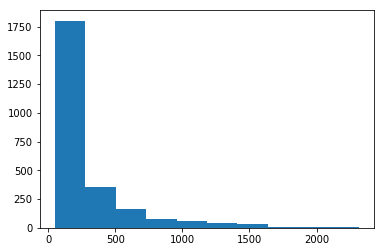

In [8]:
import matplotlib.pyplot as plt
credits =[]
temp = 0
for uid in b.userInfoDict:
    if b.userInfoDict[uid]['credit'] >= 50:
        credits.append(b.userInfoDict[uid]['credit'])
    if b.userInfoDict[uid]['credit'] >= 500:
        temp += 1
# print(sorted(credits, key = lambda x: -1*x))
print(len(credits))
print(temp)
plt.hist(credits)
plt.show()

In [6]:
# %%time
# # 计算期望
# import math

# # xDyKz
# def ComputeException(x, y, z = 1):
#     return z + z*(y-1)*(2*x-z+1)/(2*x+2)+0.5
# print(ComputeException(x=4, y=6, z = 3))
# print(ComputeException(x=2, y=20, z = 1))
# n = 5000
# times = 0
# error = 0
# for x in [4, 6, 8, 10]:
#     for y in [4, 6, 8, 10]:
#         for z in [1, 2, 3, 4]:
#             for r in range(10):
#                 total = 0
#                 for i in range(n):
#                     error, output, rollResult = tool_dice.RollDiceCommand(f'{x}d{y}k{z}')
#                     total += rollResult.totalValueList[0]
#                 mean = total/n
#                 exp = ComputeException(x, y, z)
#     #             print(mean-exp, mean, exp)
#                 error += mean-exp
#                 times+=1
# print(error/times)

# # ${\sum_{i=1}^z(1+\frac{(x-i+1)(y-1)}{x+1})}$
# # ${=z+\sum_{i=1}^z\frac{(x-i+1)(y-1)}{x+1}}$
# # ${=z+\frac{y-1}{x+1}\sum_{i=1}^z(x-i+1)}$
# # ${=z+\frac{y-1}{x+1}(zx+z+\sum_{i=1}^z(-i))}$
# # ${=z+\frac{y-1}{x+1}(zx+z+\frac{-z(1+z)}{2})}$
# # ${=z+\frac{y-1}{x+1}\frac{2zx+2z-z-z^2)}{2}}$
# # ${=z+\frac{z(y-1)}{x+1}\frac{(2x-z+1)}{2}}$
# # ${=0.5+z+\frac{z(y-1)(2x-z+1)}{2x+2}}$

In [3]:
# # 录入查询资料
# queryDict = {}

# fileName = '5E_扩展职业_by惠惠_梨子'
# title = ''
# content = ''
# with open(f'../资料/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         data = data.strip()
#         if not data:
#             if title:
#                 if len(title) > 20:
#                     print("Title too long?"+title+"##"+content)
#                 elif len(content) < 20:
#                     print("Content too small?"+title+"##"+content)
#                 content = content.replace('【换行】', '\n')
#                 queryDict[title] = content[:-1]
#             title = ''
#             content = ''
#         else:
#             if not title:
#                 title = data
#             else:
#                 content += data.strip() + '\n'
#         data = f.readline()
# content = content.replace('【换行】', '\n')
# queryDict[title] = content[:-1]
# print(queryDict.keys())
# print(queryDict[list(queryDict.keys())[0]])
# utils.UpdateJson(queryDict, f'./plugins/custom_data/{fileName}_query.json')

dict_keys(['法师:战法师:简述', '战法师:奥术偏斜', '战法师:战术思维', '战法师:力量涌动', '战法师:耐久魔法', '战法师:偏斜罩幕', '野蛮人:狂热者道途:简述', '狂热者:神性之怒', '狂热者:神之勇士', '狂热者:狂热专注', '狂热者:狂热存在', '狂热者:怒不畏死', '野蛮人:先祖护卫:简述', '先祖护卫:先祖护卫', '先祖护卫:精魂之盾', '先祖护卫:问道精魂', '先祖护卫:先祖复仇', '野蛮人:风暴先驱:简述', '野蛮人:风暴先驱:愤怒风暴', '风暴先驱:风暴之魂', '风暴先驱:风暴之盾', '风暴先驱:狂怒风暴', '吟游诗人:迷惑学院:简述', '迷惑学院:激励光环', '迷惑学院:醉人表演', '迷惑学院:统御光环', '迷惑学院:绝对统御', '吟游诗人:剑舞学院:简述', '剑舞学院:战斗风格', '剑舞学院:剑舞', '剑舞学院:额外攻击', '剑舞学院:剑舞大师', '吟游诗人:低语学院:简述', '低语学院:心灵之刃', '低语学院:恶毒言辞', '低语学院:低语光环', '低语学院:阴暗学识', '牧师:锻造领域:简述', '锻造领域:锻造祝福', '锻造领域:铁匠祝福', '锻造领域:锻造之魂', '锻造领域:神圣打击', '锻造领域:火与钢的圣徒', '牧师:坟墓领域:简述', '坟墓领域:死之环', '坟墓领域:坟墓之眼', '坟墓领域:往墓之途', '坟墓领域:死卫', '坟墓领域:强力施法', '坟墓领域:守魂者', '德鲁伊:梦境之环:简述', '梦境之环:仲夏庭院的芬馥', '梦境之环:月光与阴影的炉心', '梦境之环:隐匿通途', '梦境之环:梦境行者', '德鲁伊:牧人之环:简述', '牧人之环:林地之语', '牧人之环:精魂图腾', '牧人之环:强力召唤', '牧人之环:精魂守卫', '牧人之环:忠诚召唤', '战士:魔射手:简述', '魔射手:魔射手学识', '魔射手:奥术射击', '魔射手:魔法箭矢', '魔射手:曲线射击', '魔射手:预备射击', '魔射手:奥术射击选项', '战士:骑兵:简述', '骑兵:生而为骑', '骑兵:坚定之印', '骑兵:防护战术', '骑兵:坚守战线', '骑兵:野蛮冲撞', '骑兵:警戒守卫', '战士:武士:简述',

In [8]:
# # 录入牌堆
# import re
# fileName = '库藏宝藏cr17+'
# deckTitle = ''
# deckList = []
# deckRelayList = []
# deckDict = {}
# totalWeight = 0
# keyList = [['WEIGHT', re.compile('WEIGHT\(.*?\)')], ['ROLL', re.compile('ROLL\(.*?\)')],
#            ['DRAW', re.compile('DRAW\(.*?\)')], ['END', re.compile('END\(\)')]]
# with open(f'../资料/牌堆/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     deckTitle = data
#     data = f.readline().strip()
#     if data[:3] == '依赖:':
#         deckRelayList = data[3:].split('/')
#         deckRelayList = [relay.strip() for relay in deckRelayList]
#         data = f.readline().strip()
#     while data:
#         weight = 1
#         end = False
#         rawContent = data
#         content = []
#         for key in keyList:
#             resultList = key[1].findall(data)
#             if resultList:
#                 if key[0] == 'WEIGHT':
#                     assert len(resultList) == 1, 'WEIGHT指令只能出现一次'
#                     weight = int(resultList[0][7:-1])
#                     data = data.replace(resultList[0], '')
#                     assert weight >= 1
#                 elif key[0] == 'END':
#                     assert len(resultList) == 1, 'END指令只能出现一次'
#                     end = True
#                     data = data.replace(resultList[0], '')
#                 else:
#                     for result in resultList:
#                         index = data.find(result)
#                         arg = data[index+len(key[0])+1:index+len(result)-1]
#                         if index != 0:
#                             if data[:index].split():
#                                 content.append(['TEXT',data[:index].replace('\\n', '\n')])
#                         if key[0] == 'DRAW':
#                             targetDeck = arg.split('/')[0]
#                             assert len(arg.split('/')) <= 2
#                             assert targetDeck == deckTitle or targetDeck in deckRelayList, targetDeck
#                         elif key[0] == 'ROLL':
#                             assert tool_dice.isDiceCommand(arg)
#                         content.append([key[0],arg])
#                         data = data[index+len(result):]
#         if data.split():
#             content.append(['TEXT', data.replace('\\n', '\n')])
#         assert content, rawContent
#         totalWeight += weight
#         deckList.append({'weight':weight, 'content':content, 'end':end, 'raw':rawContent})
#         data = f.readline().strip()

# deckDict['title'] = deckTitle
# deckDict['relay'] = deckRelayList
# deckDict['totalWeight'] = totalWeight
# deckDict['list'] = deckList
# utils.UpdateJson(deckDict, f'./plugins/custom_data/{fileName}_deck.json')
# print(deckDict)

In [9]:
# # 录入菜谱
# fileName = '饮料与酒水'
# cookDict = {}
# curName = ''
# with open(f'../资料/菜谱/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         data = data.split(':')
#         if data[0] == '名称':
#             cookDict[data[1]] = {}
#             curName = data[1]
#         if data[0] == '美味' or data[0] == '难度':
#             data[1] = int(data[1])
#         if data[0] == '菜系' or data[0] == '种类' or data[0] == '风格':
#             data[1] = data[1].split('/')
#         cookDict[curName][data[0]] = data[1]
#         data = f.readline().strip()
#         if data == '':
#             data = f.readline().strip()
#             cookDict[curName]['关键词'] = cookDict[curName]['菜系'] + cookDict[curName]['种类'] + cookDict[curName]['风格']
# print(cookDict)
# utils.UpdateJson(cookDict, f'./plugins/custom_data/{fileName}_menu.json')

In [10]:
# # 录入笑话
# joke_path = '../资料/笑话'
# filesPath = os.listdir(joke_path) #读取所有文件名
# filesPath = sorted(filesPath)
# jokeDict = {}
# jokeListStr = []
# jokeListImg = []
# for fp in filesPath:
#     try:
#         if fp[-4:] == '.txt':
#             print('txt', fp)
#             absPath = os.path.join(joke_path, fp)
#             with open(absPath, 'r') as f:
#                 jokeCur = ''
#                 data = f.readline()
#                 while data:
#                     jokeCur += data
#                     data = f.readline()
#                 jokeCur = jokeCur.strip()
#                 if jokeCur:
#                     jokeListStr.append(jokeCur)
#         elif fp[-4:] == '.png' or fp[-4:] == '.gif' or fp[-4:] == '.jpg':
#             print('img', fp)
#             jokeListImg.append(fp)
#     except Exception as e:
#         print(f'error:{e}')
# assert len(jokeListStr) > 0
# print(f'笑话资料库加载成功! 共{len(jokeListStr)}个文字条目, {len(jokeListImg)}个图片条目')
# jokeDict['word'] = jokeListStr
# jokeDict['img'] = jokeListImg
# utils.UpdateJson(jokeDict, f'./plugins/custom_data/joke.json')

In [11]:
# # 录入同义词
# synDict = {}
# fileName = 'syn_spell'
# with open(f'../资料/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         synInfo = data.split(':')
#         synInfo[0] = synInfo[0].split('/')
#         for syn in synInfo[0]:
#             synDict[syn] = synInfo[1]
#         data = f.readline().strip()
# print(synDict)
# utils.UpdateJson(synDict, f'./plugins/custom_data/{fileName}.json')

In [12]:
# # 检索职业和法术列表
# queryDict = {}

# fileName = '5E_法术列表_by梨子'
# title = ''
# content = ''
# with open(f'../资料/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         data = data.strip()
#         if not data:
#             if title:
#                 title = title.split(':')[0]
#                 try:
#                     queryDict[title] += ' ' + content[:-1]
#                 except:
#                     queryDict[title] = content[:-1]
#             title = ''
#             content = ''
#         else:
#             if not title:
#                 title = data
#             else:
#                 content += data.strip() + '\n'
#         data = f.readline()
        
# title = title.split(':')[0]
# queryDict[title] += ' ' + content[:-1]
# # print(queryDict.keys())
# # print(queryDict[list(queryDict.keys())[0]])
# target = '典礼术'
# result = '（'
# for c in queryDict.keys():
#     if target in queryDict[c]:
#         result += c + '，'
# result = result[:-1] + '）'
# print(result)

In [13]:
# # 录入姓氏
# import xlrd
# nameDict = {}
# data = xlrd.open_workbook('../资料/姓名/姓名大全.xlsx')
# raceList = data.sheet_names()
# nameDict['meta'] = {}
# nameDict['info'] = {}
# for i in range(len(raceList)):
#     race = raceList[i]
#     nameDict['info'][race] = []
#     table = data.sheet_by_index(i)
#     for j in range(table.ncols//2):
#         resultCol = []
#         firstCol = table.col_values(j*2)
#         secondCol = table.col_values(j*2+1)
#         firstValid = 0
#         secondValid = 0
#         for k in range(1, len(firstCol)):
#             if firstCol[k].strip(): firstValid = k
#         for k in range(1, len(secondCol)):
#             if secondCol[k].strip(): secondValid = k
#         assert firstValid == secondValid
#         for k in range(1, firstValid):
#             resultCol.append([firstCol[k], secondCol[k]])
#         assert len(resultCol) != 0
#         nameDict['info'][race].append(resultCol)

# with open('../资料/姓名/name_config.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         temp = data.split(':')
#         index = temp[0]
#         targetList = temp[1].split('|')
#         detail = []
#         for t in targetList:
#             detail.append(t.split('-'))
#             assert len(detail[-1]) > 1
#             assert detail[-1][0] in nameDict['info'].keys()
#             for d in range(1,len(detail[-1])):
#                 detail[-1][d] = int(detail[-1][d])
#                 assert detail[-1][d] >= 0
#                 assert detail[-1][d] < len(nameDict['info'][detail[-1][0]])
#         nameDict['meta'][index] = detail
#         data = f.readline().strip()
# print(raceList)
# print(nameDict['meta'])
# utils.UpdateJson(nameDict, f'./plugins/custom_data/name.json')

In [14]:
# # 录入题目
# questionDict = {}
# sourcePath = '../资料/题目'
# filesPath = os.listdir(sourcePath) #读取所有文件名
# filesPath = sorted(filesPath)
# for fp in filesPath:
#     assert fp[-4:] == '.txt'
#     title = fp[:-4]
#     questionDict[title] = []
#     absPath = os.path.join(sourcePath, fp)
#     with open(absPath, 'r', encoding="utf-8-sig") as f:
#         data = f.readline().strip()
#         tempQuestion = ['', '', '']
#         index = 0
#         while data:
#             content = ''
#             if data[:2] == '题目':
#                 index = 0
#                 content = data[3:].strip() # 考虑中间有一个分隔符
#             elif data[:2] == '答案':
#                 index = 1
#                 content = data[3:].strip()
#                 assert content in ['T', 'F', 'A','B', 'C', 'D']
#             elif data[:2] == '解析':
#                 index = 2
#                 content = data[3:].strip()
#             else:
#                 content = '\n' + data
#             tempQuestion[index] = tempQuestion[index] + content
#             data = f.readline().strip()
#             if not data:
#                 assert len(tempQuestion[0]) != 0 and len(tempQuestion[1]) != 0
#                 questionDict[title].append(tempQuestion)
#                 tempQuestion = ['', '', '']
#                 index = 0
#                 data = f.readline().strip()
#     assert len(questionDict[title]) != 0
#     print(len(questionDict[title]))
# utils.UpdateJson(questionDict, f'./plugins/custom_data/question.json')

In [15]:
### # 将chm表格排版
# fileName = '职业表'
# result = ''
# indexRange = list(range(0,99)) #+[0]
# index = 0
# # split = '    '
# # split = '/'
# split = '  '
# with open(f'../资料/{fileName}.txt', 'r', encoding="utf-8-sig") as f:
#     data = f.readline().strip()
#     while data:
#         if index in indexRange:
#             result += data + split
#         index += 1
#         data = f.readline().strip()
#         if data == '':
#             data = f.readline().strip()
#             result = result[:-1].strip() + '\n'
#             index = 0
# result = result.replace('—', '-')
# print(result)